# 最速下降法

### 初始点 (0,0)T

初始点为: [0 0]
--The 1-th iter, the result is [1.94773865 0.        ],object value is 0.0
迭代次数为: 1
近似最优解为: [1.94773865 0.        ]


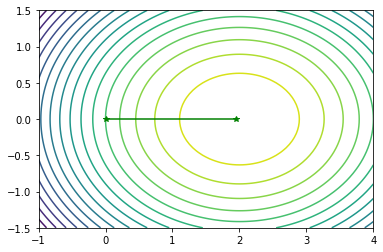

In [87]:
import random
import numpy as np
import matplotlib.pyplot as plt
 

"""
函数 F(x) = -f(x) = (x1-2)^2 + 2x2^2
梯度 g(x) = (2*(x1-2), 4x2)
"""
 

def goldsteinsearch(f,df,d,x,alpham,rho,t):
    '''
    线性搜索子函数
    数f，导数df，当前迭代点x和当前搜索方向d
    '''
    flag = 0
    a = 0
    b = alpham
    fk = f(x)
    gk = df(x)
    phi0 = fk
    dphi0 = np.dot(gk, d)
    alpha=b*random.uniform(0,1)
    while(flag==0):
        newfk = f(x + alpha * d)
        phi = newfk
        # print(phi,phi0,rho,alpha ,dphi0)
        if (phi - phi0 )<= (rho * alpha * dphi0):
            if (phi - phi0) >= ((1 - rho) * alpha * dphi0):
                flag = 1
            else:
                a = alpha
                b = b
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            a = a
            b = alpha
            alpha = (a + b) / 2
    return alpha
 

def rosenbrock(x):
    return (x[0]-2)**2 + 2*x[1]**2
 

def jacobian(x):
    return np.array([2*(x[0]-2) , 4*x[1]])
 

##最速下降法
def steepest(x0):
    print('初始点为:', x0)
    imax = 4
    W = np.zeros((2, imax))
    epo = np.zeros((2, imax))
    W[:, 0] = x0
    i = 1
    x = x0
    grad = jacobian(x)
    delta = sum(grad ** 2)  # 初始误差
 
    f=open("最速.txt",'w')
 
    while i < imax and delta > 0.1:
        p = -jacobian(x)
        x0 = x
        alpha = goldsteinsearch(rosenbrock, jacobian, p, x, 1, 0.1, 2)
        x = x + alpha * p
        W[:, i] = x
        if i % 5 == 0:
 
            epo[:,i] =np.array((i,delta))
            f.write(str(i)+"        "+str(delta)+"\n")
            #print(i,np.array((i,delta)))
        grad = jacobian(x)
        delta = sum(grad ** 2)
        print('--The %d-th iter, the result is %s,object value is %s' % (i, np.array(W[:,i]),str(epo[0,i])))
        i = i + 1
    print("迭代次数为:", i-1)
    print("近似最优解为:", x)
    W = W[:, 0:i]  # 记录迭代点
    return [W,epo]
 
if __name__=="__main__":
    X1 = np.arange(-1, 4 + 0.05, 0.05)
    X2 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = - (x1-2)**2 - 2*x2**2  # 给定的函数
    plt.contour(x1, x2, f, 20)  # 画出函数的20条轮廓线
    x0 = np.array([0, 0])
    list_out = steepest(x0)
    W=list_out[0]
    epo=list_out[1]
    plt.plot(W[0, :], W[1, :], 'g*-')  # 画出迭代点收敛的轨迹
    plt.show()

### 初始点 (0,1)T  迭代次数 3

初始点为: [0 1]
--The 1-th iter, the result is [0.87534885 0.12465115],object value is 0.0
--The 2-th iter, the result is [ 1.67617833 -0.05286935],object value is 0.0
--The 3-th iter, the result is [2.00209186 0.05355241],object value is 0.0
迭代次数为: 3
近似最优解为: [2.00209186 0.05355241]


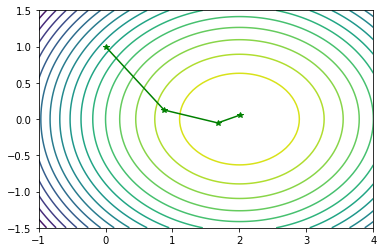

In [91]:
import random
import numpy as np
import matplotlib.pyplot as plt
 

"""
函数 F(x) = -f(x) = (x1-2)^2 + 2x2^2
梯度 g(x) = (2*(x1-2), 4x2)
"""

def goldsteinsearch(f,df,d,x,alpham,rho,t):
    '''
    线性搜索子函数
    数f，导数df，当前迭代点x和当前搜索方向d
    '''
    flag = 0
    a = 0
    b = alpham
    fk = f(x)
    gk = df(x)
    phi0 = fk
    dphi0 = np.dot(gk, d)
    alpha=b*random.uniform(0,1)
    while(flag==0):
        newfk = f(x + alpha * d)
        phi = newfk
        # print(phi,phi0,rho,alpha ,dphi0)
        if (phi - phi0 )<= (rho * alpha * dphi0):
            if (phi - phi0) >= ((1 - rho) * alpha * dphi0):
                flag = 1
            else:
                a = alpha
                b = b
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            a = a
            b = alpha
            alpha = (a + b) / 2
    return alpha
 

def rosenbrock(x):
    return (x[0]-2)**2 + 2*x[1]**2
 

def jacobian(x):
    return np.array([2*(x[0]-2) , 4*x[1]])
 

##最速下降法
def steepest(x0):
    print('初始点为:', x0)
    imax = 4
    W = np.zeros((2, imax))
    epo = np.zeros((2, imax))
    W[:, 0] = x0
    i = 1
    x = x0
    grad = jacobian(x)
    delta = sum(grad ** 2)  # 初始误差
 
    f=open("最速.txt",'w')
 
    while i < imax and delta > 0.1:
        p = -jacobian(x)
        x0 = x
        alpha = goldsteinsearch(rosenbrock, jacobian, p, x, 1, 0.1, 2)
        x = x + alpha * p
        W[:, i] = x
        if i % 5 == 0:
 
            epo[:,i] =np.array((i,delta))
            f.write(str(i)+"        "+str(delta)+"\n")
            #print(i,np.array((i,delta)))
        grad = jacobian(x)
        delta = sum(grad ** 2)
        print('--The %d-th iter, the result is %s,object value is %s' % (i, np.array(W[:,i]),str(epo[0,i])))
        i = i + 1
    print("迭代次数为:", i-1)
    print("近似最优解为:", x)
    W = W[:, 0:i]  # 记录迭代点
    return [W,epo]
 
if __name__=="__main__":
    X1 = np.arange(-1, 4 + 0.05, 0.05)
    X2 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = - (x1-2)**2 - 2*x2**2  # 给定的函数
    plt.contour(x1, x2, f, 20) # 画出函数的20条轮廓线
    x0 = np.array([0, 1])      # 初始点
    list_out = steepest(x0)
    W=list_out[0]
    epo=list_out[1]
    plt.plot(W[0, :], W[1, :], 'g*-')  # 画出迭代点收敛的轨迹
    plt.show()

# 拟牛顿法（DFP）

### 初始点 (0,1)T  迭代次数 3

初始点为: [0 1]
--The 1-th iter, the result is [0.1 0.9],object value is 5.2300
--The 2-th iter, the result is [2.13333333 0.06666667],object value is 0.0267
--The 3-th iter, the result is [ 1.9881142  -0.01450068],object value is 0.0006
迭代次数为: 3
近似最优解为: [ 1.9881142  -0.01450068]


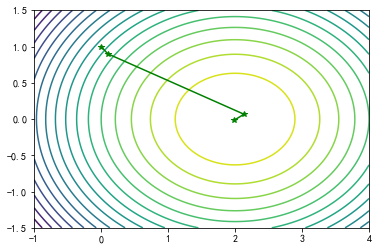

In [159]:
import numpy as np


"""
函数 F(x) = -f(x) = (x1-2)^2 + 2x2^2
梯度 g(x) = (2*(x1-2), 4x2)
hessian hess = [[2,0],[0,2]]
"""
 
#函数表达式
fun = lambda x:(x[0]-2)**2 + 2*x[1]**2
 
#梯度向量
gfun = lambda x:np.array([2*(x[0]-2) , 4*x[1]])
 
#Hessian矩阵
hess = lambda x:np.array([[2,0],[0,2]])
 
def dfp(fun,gfun,hess,x0):
    #功能：用DFP算法求解无约束问题：min fun(x)
    #输入：x0式初始点，fun,gfun，hess分别是目标函数和梯度,Hessian矩阵格式
    #输出：x,val分别是近似最优点，最优解，k是迭代次数
    print('初始点为:', x0)
    maxk = 4
    rho = 0.05
    sigma = 0.4
    epsilon = 1e-5 #迭代停止条件
    k = 1
    n = np.shape(x0)[0]
    #将Hessian矩阵初始化为单位矩阵
    Hk = np.linalg.inv(hess(x0))
    W = np.zeros((2, 10 ** 3))# 保存迭代变量x
    W[:, 0] = x0
    while k < maxk:
        gk = gfun(x0)
        if np.linalg.norm(gk) < epsilon:
            break
        dk = -1.0*np.dot(Hk,gk)
#         print dk
        m = 0;
        mk = 0
        while m < 20:#用Armijo搜索步长
            if fun(x0 + rho**m*dk) < fun(x0) + sigma*rho**m*np.dot(gk,dk):
                mk = m
                break
            m += 1
        #print mk
        #DFP校正
        x = x0 + rho**mk*dk
        W[:, k] = x
        print('--The {}-th iter, the result is {},object value is {:.4f}'.format(k, np.array(x),fun(x)))
        sk = x - x0
        yk = gfun(x) - gk
        if np.dot(sk,yk) > 0:
            Hy = np.dot(Hk,yk)
            sy = np.dot(sk,yk) #向量的点积
            yHy = np.dot(np.dot(yk,Hk),yk) #yHy是标量
            Hk = Hk - 1.0*Hy.reshape((n,1))*Hy/yHy + 1.0*sk.reshape((n,1))*sk/sy
        k += 1
        x0 = x
    W = W[:, 0:k]  # 记录迭代点
    print("迭代次数为:", k-1)
    print("近似最优解为:", x)
    #print(x0,fun0,k)
    return W
 

if __name__=="__main__":
    X1 = np.arange(-1, 4 + 0.05, 0.05)
    X2 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = - (x1-2)**2 - 2*x2**2  # 给定的函数
    plt.contour(x1, x2, f, 20)  # 画出函数的20条轮廓线
    x0 = np.array([0, 1])
    W = dfp(fun,gfun,hess,np.array([0,1]))
    plt.plot(W[0, :], W[1, :], 'g*-')  # 画出迭代点收敛的轨迹
    plt.show()

# 共轭梯度法（PRP）

### 初始点 (0,1)T  迭代次数 3

初始点为: [0 1]
--The 1-th iter, the result is [ 1.42147209 -0.42147209],object value is 0.6900
--The 2-th iter, the result is [1.83027719 0.17417745],object value is 0.0895
--The 3-th iter, the result is [ 1.98564589 -0.14471574],object value is 0.0421
迭代次数为: 3
近似最优解为: [ 1.98564589 -0.14471574]


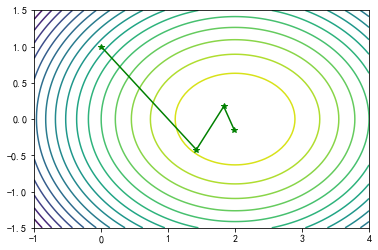

In [161]:
import random
import numpy as np
import matplotlib.pyplot as plt
 

"""
函数 F(x) = -f(x) = (x1-2)^2 + 2x2^2
梯度 g(x) = (2*(x1-2), 4x2)
hessian hess = [[2,0],[0,2]]
"""

def goldsteinsearch(f,df,d,x,alpham,rho,t):
    '''
    线性搜索子函数
    数f，导数df，当前迭代点x和当前搜索方向d
    '''
    flag = 0
    a = 0
    b = alpham
    fk = f(x)
    gk = df(x)
    phi0 = fk
    dphi0 = np.dot(gk, d)
    alpha=b*random.uniform(0,1)
    while(flag==0):
        newfk = f(x + alpha * d)
        phi = newfk
        # print(phi,phi0,rho,alpha ,dphi0)
        if (phi - phi0 )<= (rho * alpha * dphi0):
            if (phi - phi0) >= ((1 - rho) * alpha * dphi0):
                flag = 1
            else:
                a = alpha
                b = b
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            a = a
            b = alpha
            alpha = (a + b) / 2
    return alpha
 

def rosenbrock(x):
    return (x[0]-2)**2 + 2*x[1]**2
 

def jacobian(x):
    return np.array([2*(x[0]-2) , 4*x[1]])
 
    
# 共轭梯度法（PRP）
def conjugate_gradient(x0, eps):
    print('初始点为:', x0)
    x = x0
    gk = gradient_function(x)
    sigma = np.linalg.norm(gk)
    step = 1
    W = np.zeros((2, 10 ** 3))# 保存迭代变量x
    W[:, 0] = x0
    while sigma > eps and step < 4:
        p = -jacobian(x)
        alpha = goldsteinsearch(rosenbrock, jacobian, p, x, 1, 0.1, 2)
        x = x + alpha * p
        W[:, step] = x
        g0 = gk
        gk = jacobian(x)
        miu = (np.linalg.norm(gk) / np.linalg.norm(g0))**2
        p = -1 * gk + miu * p
        sigma = np.linalg.norm(gk)
        print('--The {}-th iter, the result is {},object value is {:.4f}'.format(step, np.array(x),rosenbrock(x)))
        step += 1
    print("迭代次数为:", step-1)
    print("近似最优解为:", x)
    W = W[:, 0:step]  # 记录迭代点
    return W

 
if __name__=="__main__":
    X1 = np.arange(-1, 4 + 0.05, 0.05)
    X2 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = - (x1-2)**2 - 2*x2**2  # 给定的函数
    plt.contour(x1, x2, f, 20)  # 画出函数的20条轮廓线
    x0 = np.array([0, 1])
    W = conjugate_gradient(x0,0.1)
    plt.plot(W[0, :], W[1, :], 'g*-')  # 画出迭代点收敛的轨迹
    plt.show()

# 迭代路径可视化

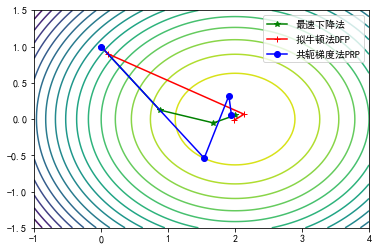

In [156]:
import numpy as np
import matplotlib.pyplot as plt


if __name__=="__main__":
    X1 = np.arange(-1, 4 + 0.05, 0.05)
    X2 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = - (x1-2)**2 - 2*x2**2  # 给定的函数
    plt.contour(x1, x2, f, 20)  # 画出函数的20条轮廓线
    Wsteepest = np.array([[0,0.87534885,1.67617833,2.00209186], [1,0.12465115,-0.05286935,0.05355241]])
    Wdfp = np.array([[0,0.1,2.13333333,1.9881142], [1,0.9,0.06666667,-0.01450068]])
    Wconjugate_gradient = np.array([[0,1.53872684,1.9071625,1.94518828], [1,-0.53872684,0.32187472,0.0581983]])
    plt.plot(Wsteepest[0, :], Wsteepest[1, :], 'g*-', label='最速下降法')  # 画出迭代点收敛的轨迹
    plt.plot(Wdfp[0, :], Wdfp[1, :], 'r+-', label='拟牛顿法DFP')
    plt.plot(Wconjugate_gradient[0, :], Wconjugate_gradient[1, :], 'bo-', label='共轭梯度法PRP')
    plt.legend()
    plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文
    plt.rcParams['axes.unicode_minus'] = False 
    plt.show()